Found 5161 images belonging to 3 classes.
Found 648 images belonging to 3 classes.


<ipython-input-1-c0bff46eb5eb>:98: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
515/515 [==============================] - ETA: 0s - loss: 0.5354 - accuracy: 0.7946
Epoch 1: accuracy improved from -inf to 0.79459, saving model to /content/drive/MyDrive/Chicken Dis/weights_model/chickenDisease1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


515/515 [==============================] - 1299s 3s/step - loss: 0.5354 - accuracy: 0.7946 - val_loss: 0.5135 - val_accuracy: 0.8062
Epoch 2/100
515/515 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8456
Epoch 2: accuracy improved from 0.79459 to 0.84556, saving model to /content/drive/MyDrive/Chicken Dis/weights_model/chickenDisease1.h5
515/515 [==============================] - 68s 132ms/step - loss: 0.4052 - accuracy: 0.8456 - val_loss: 7.8690 - val_accuracy: 0.4078
Epoch 3/100
515/515 [==============================] - ETA: 0s - loss: 0.3804 - accuracy: 0.8576
Epoch 3: accuracy improved from 0.84556 to 0.85762, saving model to /content/drive/MyDrive/Chicken Dis/weights_model/chickenDisease1.h5
515/515 [==============================] - 81s 157ms/step - loss: 0.3804 - accuracy: 0.8576 - val_loss: 0.2597 - val_accuracy: 0.8969
Epoch 4/100
515/515 [==============================] - ETA: 0s - loss: 0.3294 - accuracy: 0.8706
Epoch 4: accuracy improved from 0.85

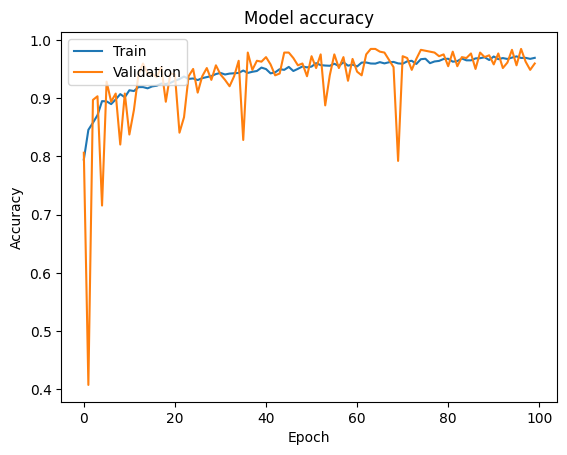

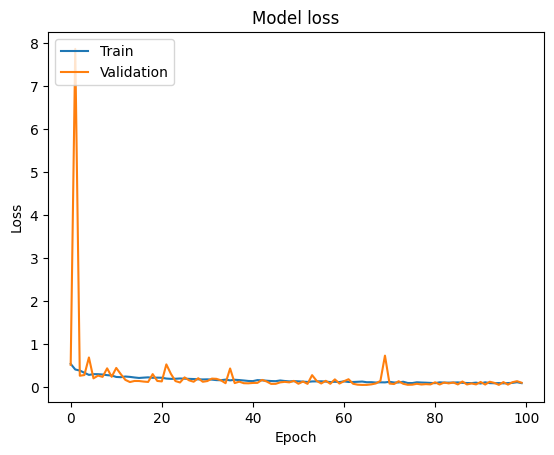

In [ ]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization


# image dimension..0
img_width, img_height = 64, 64

# training and validation set directory
train_data_dir = '/content/drive/MyDrive/Chicken Dis/Training'
validation_data_dir = '/content/drive/MyDrive/Chicken Dis/Validation'

num_train_samples = 5151
num_validation_samples = 642

epochs = 100
batch_size = 10

input_shape = (img_width, img_height, 3)

# this is the augmentation configuration use for training
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255, #to normalize the data
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# this is the augmentation configuration use for testing:only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    #color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    #color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

#Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# to print the summary of the layers
#model.summary()

#define the checkpoint
filepath="/content/drive/MyDrive/Chicken Dis/weights_model/chickenDisease1.h5"
checkpointer = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

import keras
history = model.fit_generator(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_samples // batch_size,
    callbacks = [checkpointer]
)

#TRAINING HISTORY VISUALIZATION
import matplotlib.pyplot as plt


#TRAINING HISTORY VISUALIZATION

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model.save('/content/drive/MyDrive/Chicken Dis/weights_model/chickenDiseaseFinal.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.models import load_model

new_model = load_model("/content/drive/MyDrive/Chicken Dis/weights_model/chickenDiseaseFinal.h5")

checkpoint = ModelCheckpoint(filepath, monitor = 'accuracy', verbose = 1, save_best_only = True, mode = 'max')
history = new_model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_samples // batch_size,
    callbacks=[checkpoint]
)


Epoch 1/100
515/515 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9730
Epoch 1: accuracy improved from -inf to 0.97296, saving model to /content/drive/MyDrive/Chicken Dis/weights_model/chickenDisease1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


515/515 [==============================] - 73s 139ms/step - loss: 0.0787 - accuracy: 0.9730 - val_loss: 0.0939 - val_accuracy: 0.9594
Epoch 2/100
515/515 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9718
Epoch 2: accuracy did not improve from 0.97296
515/515 [==============================] - 67s 130ms/step - loss: 0.0781 - accuracy: 0.9718 - val_loss: 0.0764 - val_accuracy: 0.9672
Epoch 3/100
515/515 [==============================] - ETA: 0s - loss: 0.0907 - accuracy: 0.9687
Epoch 3: accuracy did not improve from 0.97296
515/515 [==============================] - 69s 134ms/step - loss: 0.0907 - accuracy: 0.9687 - val_loss: 0.0564 - val_accuracy: 0.9750
Epoch 4/100
515/515 [==============================] - ETA: 0s - loss: 0.0961 - accuracy: 0.9675
Epoch 4: accuracy did not improve from 0.97296
515/515 [==============================] - 68s 131ms/step - loss: 0.0961 - accuracy: 0.9675 - val_loss: 0.0601 - val_accuracy: 0.9781
Epoch 5/100
515/515 [===========

Found 5161 images belonging to 3 classes.
Found 642 images belonging to 3 classes.


<ipython-input-4-99dda8049d3d>:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = test_model.predict_generator(test_generator, verbose=1, steps=num_test_samples/batch_size)


64/64 [==============================] - 170s 3s/step
Confusion Matrix:
 [[209   0   1]
 [  3 186  16]
 [  0   1 226]]
Accuracy: 0.9672897196261683
Precision: 0.9689273937166456
Recall: 0.9672897196261683
Specificity: 1.0
F1-score: 0.9670664766016196


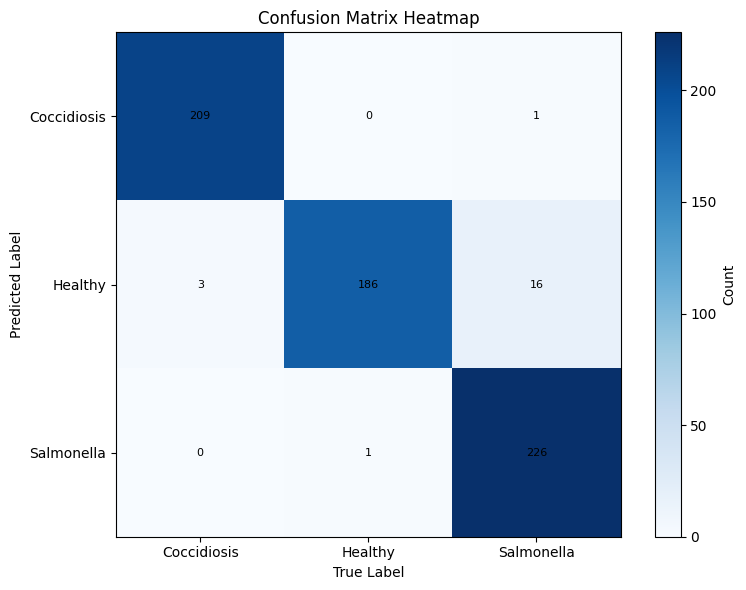

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import pandas as pd

# dimensions of our images.
num_test_samples = 642
img_width, img_height = 64, 64
batch_size = 10

train_data_dir = '/content/drive/MyDrive/Chicken Dis/Training'
test_data_dir = '/content/drive/MyDrive/Chicken Dis/Testing'

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = test_datagen.flow_from_directory(
    train_data_dir,
    #color_mode = 'grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    #color_mode="grayscale",
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

test_generator.reset()
test_model = load_model('/content/drive/MyDrive/Chicken Dis/weights_model/chickenDiseaseFinal.h5')

#output in probabilities
pred = test_model.predict_generator(test_generator, verbose=1, steps=num_test_samples/batch_size)

#convert the output into class number
predicted_class_indices=np.argmax(pred,axis=1)

#name of the classes
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
export_csv = results.to_csv (r'/content/drive/MyDrive/Chicken Dis/weights_model/chickenDiseaseResult.csv', index = None, header=True)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_true = test_generator.classes  # Get true labels from generator
y_pred = predicted_class_indices  # Predicted class labels

# Calculate confusion matrix, accuracy, precision, recall, F1-score, specificity
confusion_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
tn  = confusion_matrix[0, 0]
fp = confusion_matrix[0, 1]
specificity = tn / (tn + fp)  # Assuming binary classification
f1 = f1_score(y_true, y_pred, average='weighted')

# Print or store the results
print("Confusion Matrix:\n", confusion_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1-score:", f1)

# Create the confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)

class_labels = sorted(train_generator.class_indices.keys())

# Configure plot elements
plt.colorbar(label='Count')
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')

# Add text labels to each cell
for row in range(len(confusion_matrix)):
    for col in range(len(confusion_matrix[row])):
        plt.text(col, row, confusion_matrix[row][col], ha='center', va='center', fontsize=8)

plt.grid(False)
plt.tight_layout()
plt.show()